employee retention dataset: https://www.kaggle.com/giripujar/hr-analytics

## Problem:
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [23]:
df = pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Analysis & Preprocessing

In [24]:
left = df[df.left==1]
left.shape

(3571, 10)

In [25]:
retained = df[df.left==0]
retained.shape

(11428, 10)

avg. no's for all col's

In [26]:
df.select_dtypes(include=[np.number]).groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Factors/features affecting:**
1. 'satisfaction_level'
2. 'average_montly_hours'
3. 'Work_accident'
4. 'promotion_last_5years'

checking for null values

In [27]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

* check for missing (null) values in each column of df.
* 'isnull()' returns a df of the same shape as df with True for null values and False otherwise.
* 'sum()' counts the True values in each column, & give the number of null values per column.
* output shows that none of the columns have any missing values (all counts are 0).

<Axes: xlabel='salary'>

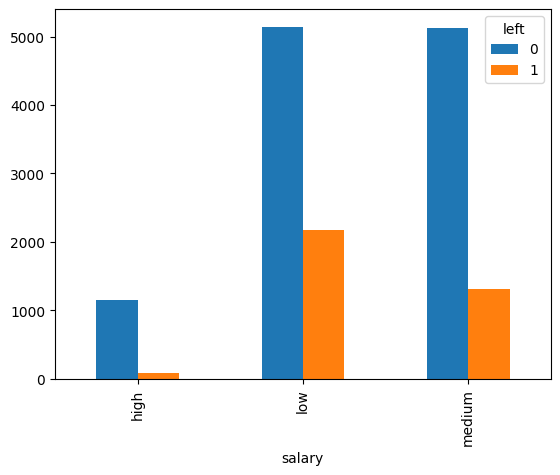

In [28]:
pd.crosstab(df.salary, df.left).plot(kind='bar') # Impact of salary on employee retention

low & mid salary

<Axes: xlabel='Department'>

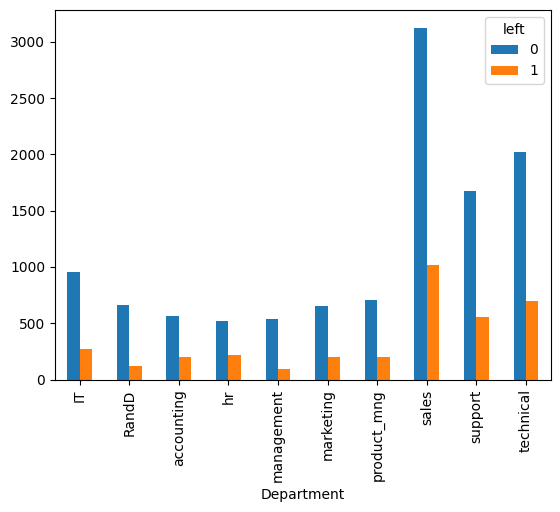

In [29]:
pd.crosstab(df.Department,df.left).plot(kind='bar') # Department wise employee retention rate

**Main factors/features affecting:**
1. 'satisfaction_level'
2. 'average_montly_hours'
3. 'Work_accident'
4. 'promotion_last_5years'
5. 'salary'

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [31]:
df1 = df[['satisfaction_level', 'average_montly_hours', 'Work_accident', 'promotion_last_5years', 'salary']]
df1.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,low
1,0.80,262,0,0,medium
2,0.11,272,0,0,medium
3,0.72,223,0,0,low
4,0.37,159,0,0,low


salary dummy variable using OrdinalEncoder

In [32]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [["low", "medium", "high"]], dtype=int)

df2 = df1.copy()
df2["salary"] = oe.fit_transform(df1[["salary"]])
df2.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [33]:
df2["salary"].unique()

array([0, 1, 2])

## Model

In [34]:
X = df2
X.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
0,0.38,157,0,0,0
1,0.80,262,0,0,1
2,0.11,272,0,0,1
3,0.72,223,0,0,0
4,0.37,159,0,0,0


In [35]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Train test split (80/20)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=50)

In [37]:
X_test.head()

,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,salary
5532,0.58,157,0,1,0
3341,0.64,218,0,0,1
8587,0.94,203,0,0,0
3357,0.71,180,1,0,1
3573,0.76,266,0,0,1


In [38]:
y_test.head()

5532    0
3341    0
8587    0
3357    0
3573    0
Name: left, dtype: int64

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
model.score(X_test, y_test)

0.7875833333333333

Text(0.5, 1.0, 'Confusion Matrix')

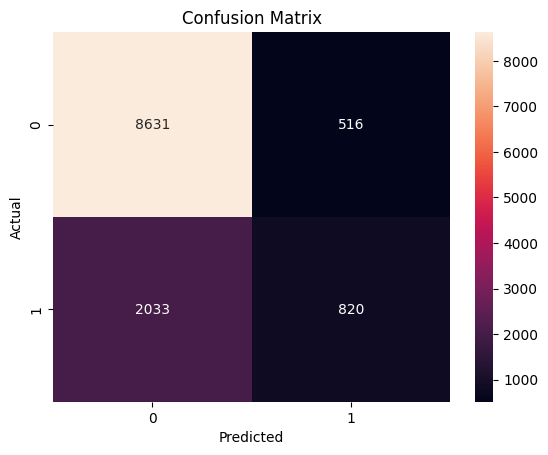

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [43]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.39150155168297923